In [77]:
%reset -f
import numpy as np
import torch
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import gym

from gym.envs.toy_text.frozen_lake import generate_random_map

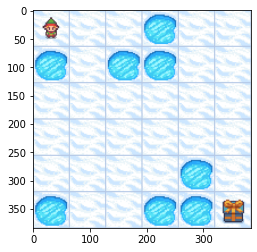

In [78]:
size = 6
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

# SARSA

In [75]:
action_values = np.zeros(shape=(size**2,4))

def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))
    
    
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action
            
sarsa(action_values, policy, 4000)

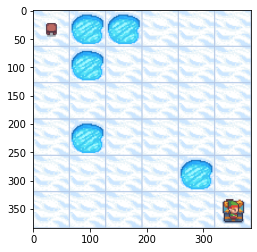

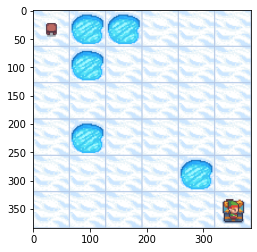

In [76]:
import time
state = env.reset()
action = policy(state, epsilon=0)
done = False
while not done:
    plt.cla()
    next_state, reward, done, _ = env.step(action)
    action = policy(next_state, epsilon=0)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()

# Qlearning

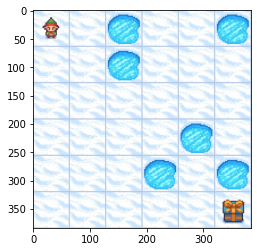

In [278]:
size = 6
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

In [279]:
action_values = np.zeros(shape=(size**2,4))

def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))
    
def exploratory_policy(state):
    return np.random.randint(4)

def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action
            
q_learning(action_values, exploratory_policy, target_policy, 4000)

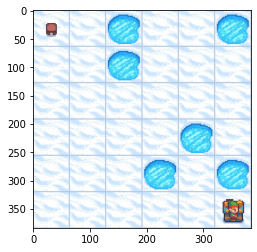

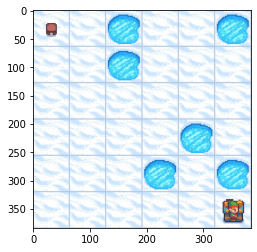

In [280]:
import time
state = env.reset()
done = False
while not done:
    plt.cla()
    action = target_policy(state)

    state, reward, done, _ = env.step(action)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()

# nStep SARSA

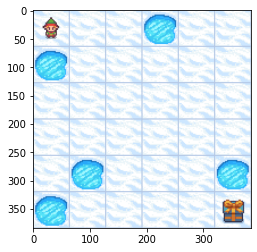

In [269]:
size = 6
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

In [270]:
action_values = np.zeros(shape=(size**2,4))

def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))
    
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2,n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0
        while t-n < len(transitions):
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])
            
            if t >= n:
                G = (1-done)*action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma*G
                action_values[state_t][action_t] += alpha*(G - action_values[state_t][action_t])

            
            t += 1
            state = next_state
            action = next_action
            
n_step_sarsa(action_values, policy, 4000)

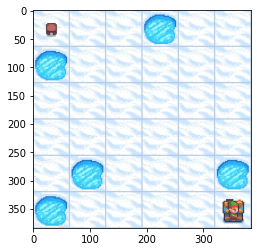

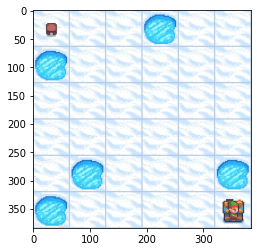

In [271]:
import time
state = env.reset()
action = policy(state, epsilon=0)
done = False
while not done:
    plt.cla()
    next_state, reward, done, _ = env.step(action)
    action = policy(next_state, epsilon=0)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()